# Analyzing First names in the US over the last 137 years
#### Submitted by : Dipen Chovatiya

## Introduction

In this report we will analyze the first names used in Social Security card in United States. The data was provided by Social Security Administration and can be downloaded from [here](https://www.ssa.gov/oact/babynames/names.zip). The dataset contains data from 1880 to 2017. Our focus is to find the trends and insights from the dataset. We will also try to find the answers to some of these trends and finds the factors those affects increasing or decreasing popularity of the first names. Moreover, this data also provides classification of names according to different genders. We will also look at some of those trends.

## Imports

In [1]:
import numpy as np   # Add various features for array , matrices and other high-level mathematics functions.
from glob import glob # Used for retriving all the file using matching certain pattern.
from os.path import join 

import matplotlib.pyplot as plt   # Pythons 2D plotting Library for plotting graphs
%matplotlib inline  

## Read the data

The data provided to us is sorted together in different files according to the year of birth. We will store this data into a dictionary in python. Dictionary helps us access the data in a very efficient and simpler way.

In [2]:
files = sorted(glob(join('names', 'yob*.txt'))) # getting the names of all files containing our data.
print('Total number of files', len(files))

Total number of files 138


In [3]:
d = {}  # dictionary to store all the data
years = len(files) # total number of years (138 in our case)
firstyear = 1880

for file in files: # loop over all the files to retrieve data
    year = int(file[-8:-4])
    with open(file) as f: # get all data for sepcific yob
        lines = [line.strip() for line in f.read().split('\n') if len(line.strip())>0 ] # list of 'Mary, F, 67777'
        
    for line in lines: # seperte name , gender and count 
        name, gender, scount = line.split(',')
        count = int(scount) # because scount is a str  
        if name not in d:
            d[name] = {'F': np.zeros(years,dtype=int) , 'M': np.zeros(years,dtype=int) }
            
        d[name][gender][year - firstyear]  = count

All our data is now stored in the dictionary which we can access easily. Let's take an example for better understanding of how data is stored.

In [4]:
d['Emma']

{'F': array([ 2003,  2034,  2303,  2367,  2587,  2728,  2764,  2647,  3087,
         2884,  2980,  2884,  3128,  2968,  2937,  2952,  2872,  2698,
         2788,  2445,  3095,  2374,  2514,  2308,  2312,  2298,  2224,
         2356,  2357,  2338,  2607,  2616,  3357,  3474,  3972,  5044,
         5217,  5121,  5324,  5087,  5237,  5073,  5013,  4976,  4899,
         4713,  4481,  4325,  4018,  3802,  3555,  3307,  3331,  3151,
         2941,  2802,  2833,  2748,  2668,  2685,  2607,  2545,  2605,
         2422,  2246,  2052,  2071,  2142,  2097,  2000,  1898,  1728,
         1711,  1590,  1527,  1461,  1342,  1214,  1086,  1057,   980,
          888,   797,   723,   770,   639,   619,   564,   492,   516,
          527,   473,   454,   418,   495,   478,   414,   478,   444,
          488,   533,   534,   562,   551,   676,   944,  1257,  1588,
         1788,  1935,  2417,  2592,  3209,  4104,  4763,  5044,  6143,
         7739, 10437, 11728, 12548, 13307, 16538, 22704, 21606, 20339,
 

When "Emma" is passed as key to dictionary , We see the trend in male and female names over the years from 1880 represented as first year and 2017 as last year. Now let's make a function which will help better visualize the distribution.

## Helper Function for visualizing

In [5]:
plt.style.use('seaborn')  # Setting the graph style to seaborn
def plot_name(name):
    year = range(firstyear, firstyear + years) # this gives a list of years ranging from 1880-2017
    plt.plot(year, d[name]['F'], label = 'Females')
    plt.plot(year, d[name]['M'], color = 'r', label = 'Males')
    plt.xlabel('Years')
    plt.ylabel('Count')
    plt.title(f"Frequency count over the years for {name}")
    plt.legend()

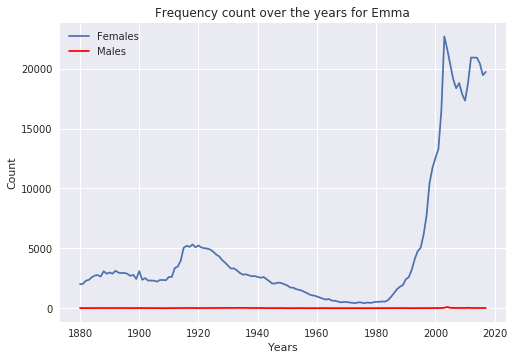

In [6]:
plot_name("Emma")

We see that popularity of the name "Emma" began to rise after 1990.Somewhere around 2003 , popularity of the name "Emma" was highest. We also see that "Emma" is not a popular name amongst Males and is zero every year, except around 2003. There are some male babies names "Emma" in 2003, this might be because exponential increase in the popularity in last few years from 2003.

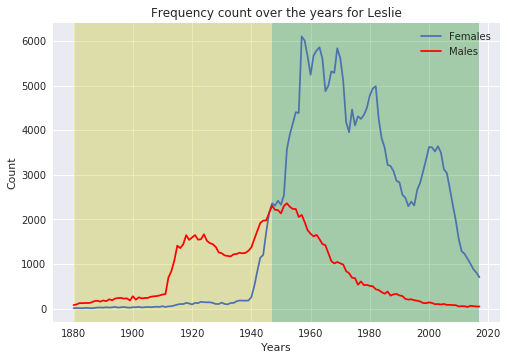

In [7]:
plot_name('Leslie')
plt.axvspan(1880, 1947, facecolor='y', alpha=0.3)
plt.axvspan(1947, 2017, facecolor='g', alpha=0.3)
plt.show()

Name "Leslie" started gaining its popularity as a male name till 1940. But between 1940 to 1950, the popularity among female began to increase and was same around 1945. After that, popularity of "Leslie" diminished among males and increased at the same time among females.Stats also show that currently male popularity is almost zero and female popularity is also decreasing very fast after 2000.

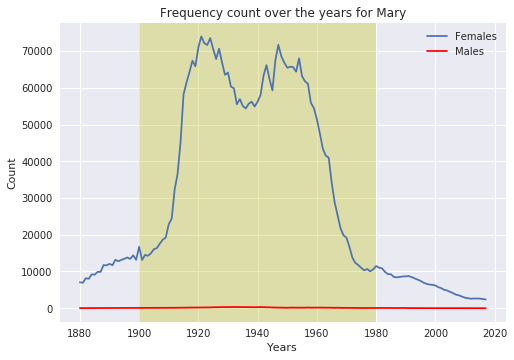

In [8]:
plot_name("Mary")
plt.axvspan(1900, 1980, facecolor='y', alpha=0.3)
plt.show()

"Mary" was a very famous name from 1990 to 1980 with over 70000 female babies named "Mary" in 1920."Mary" is also the name of 6 characters in bible.And because people were more religious during 1900 to 2000 than they are today. It explains the popularity of name "Mary" in last century. 

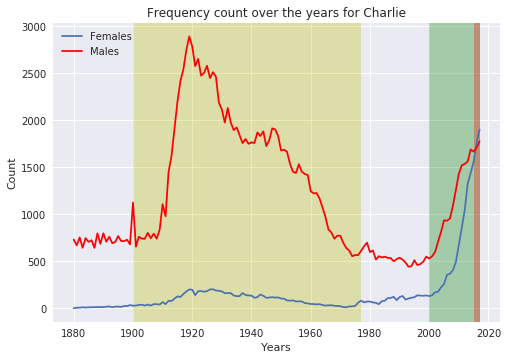

In [9]:
plot_name("Charlie")
plt.axvspan(1900, 1977, facecolor='y', alpha=0.3)
plt.axvspan(2000, 2017, facecolor='g', alpha=0.3)
plt.axvspan(2015, 2017, facecolor='r', alpha=0.3)
plt.show()

 The name began gaining popularity after after 1905. The famous English comic actor "Charlie Chaplin" was born in 1889 and began gaining popularity among people at the same time as the popularity of the name began increasing. Popularity began to slowly decrease until 2000, after which both male and female popularity increase drastically. In the recent years the popularity of this name is more among female than male.Increase in popularity after 2000 can be explained by "Charlie's Angle" : a movie released in 2000 starring three top female actress of the time.Recently, popularity of the name "Charlie" among female has passed the popularity among male. 
 
## Top Names in United States

### Unique Names

Since we are storing names as keys in the dictionary , length of the dictionary will be the total unique names in the data.

In [10]:
total_names_count = {} # dictionary to store names and their total count including Male and Female
total_female_names_count = {} # Store unique names of Female names and their count
total_male_names_count = {} # Store unique names of Male names and their count

for name in d.keys() : # Loop over all the records 
    fcount = 0
    mcount = 0
    for gender in d[name].keys() :
        for year in range(years) :
            if gender == 'F' :  fcount += d[name][gender][year]
            elif gender == 'M':  mcount += d[name][gender][year]
                
    total_names_count [name] = fcount + mcount
    if fcount != 0 : total_female_names_count[name] = fcount
    if mcount != 0 : total_male_names_count [name] = mcount    

In [11]:
print('Number of unique name : ',len(total_names_count))
print('Number of unique female name : ',len(total_female_names_count))
print('Number of unique male name : ', len(total_male_names_count))

Number of unique name :  97310
Number of unique female name :  67046
Number of unique male name :  40927


Number of female names is noticeably greater than male name.  Now lets find number of unique names over the time for each.

In [12]:
unique_fname_count = []
unique_mname_count = []
unique_name_count = []

for i in range(years) :
    fcount = 0
    mcount = 0
    unique = 0
    for name in d.keys() :
        flag = 0
        if d[name]["F"][i] != 0 :
            fcount += 1
            flag = 1
        if d[name]["M"][i] != 0 :
            mcount += 1
            flag = 1
        if flag == 1:
            unique +=1
    unique_name_count.append(unique)
    unique_fname_count.append(fcount)
    unique_mname_count.append(mcount)
   

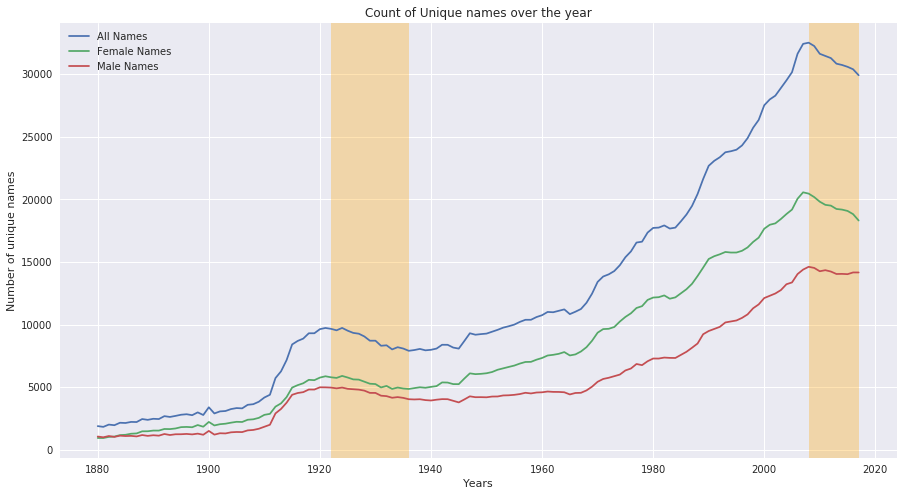

In [13]:
plt.figure(figsize=(15,8))
plt.plot(range(firstyear,firstyear+years),unique_name_count,label = "All Names")
plt.plot(range(firstyear,firstyear+years),unique_fname_count,label = "Female Names")
plt.plot(range(firstyear,firstyear+years),unique_mname_count,label = "Male Names")
plt.xlabel("Years")
plt.ylabel("Number of unique names")
plt.title("Count of Unique names over the year")
plt.legend()
plt.axvspan(1922, 1936, facecolor='orange', alpha=0.3)
plt.axvspan(2008, 2017, facecolor='orange', alpha=0.3)
plt.show()

We see that number of unique names have been increasing predominantly. But as we see from the colored portion of the graph above, some of the names are forgotten by the people. Number of unique names tend to decrease between 1922 to 1936 and 2008 to 2017.

### Top 10 Names ( all genders included )

In [14]:
sorted_names = sorted(total_names_count, key=lambda x: total_names_count[x], reverse=True)
for i,key in enumerate(sorted_names) :
    print("{:2}  {:8} {}  F:{:8}   M:{:8}".format(i+1,key, total_names_count[key],total_female_names_count[key],total_male_names_count[key]))
    if i == 9 : break

 1  James    5173828  F:   23356   M: 5150472
 2  John     5137142  F:   21676   M: 5115466
 3  Robert   4834915  F:   20100   M: 4814815
 4  Michael  4372536  F:   21712   M: 4350824
 5  Mary     4138360  F: 4123200   M:   15160
 6  William  4118553  F:   15949   M: 4102604
 7  David    3624225  F:   12896   M: 3611329
 8  Joseph   2614083  F:   10638   M: 2603445
 9  Richard  2572613  F:    9531   M: 2563082
10  Charles  2398453  F:   12405   M: 2386048


In top 10 Names in United States, all the names are contributed by male dominating names except "Mary".

### Top 10 Female Names

In [15]:
sorted_female_names = sorted(total_female_names_count, key=lambda x: total_female_names_count[x], reverse=True)
for i,key in enumerate(sorted_female_names) :
    print("{:2}  {:10} {}   M:{:8}".format(i+1,key, total_female_names_count[key],total_male_names_count[key]))
    if i == 9 : break

 1  Mary       4123200   M:   15160
 2  Elizabeth  1629679   M:    5181
 3  Patricia   1571692   M:    4962
 4  Jennifer   1466281   M:    4837
 5  Linda      1452249   M:    3757
 6  Barbara    1434060   M:    4136
 7  Margaret   1246649   M:    3743
 8  Susan      1121440   M:    2543
 9  Dorothy    1107096   M:    3677
10  Sarah      1073895   M:    3320


### Top 10 Male Names

In [16]:
sorted_male_names = sorted(total_male_names_count, key=lambda x: total_male_names_count[x], reverse=True)
for i,key in enumerate(sorted_male_names) :
    print("{:2}  {:12} {}   F:{:8}".format(i+1,key, total_male_names_count[key],total_female_names_count[key]))
    if i == 9 : break

 1  James        5150472   F:   23356
 2  John         5115466   F:   21676
 3  Robert       4814815   F:   20100
 4  Michael      4350824   F:   21712
 5  William      4102604   F:   15949
 6  David        3611329   F:   12896
 7  Joseph       2603445   F:   10638
 8  Richard      2563082   F:    9531
 9  Charles      2386048   F:   12405
10  Thomas       2304948   F:    8467


## Number of common name

In [17]:
common_name = total_female_names_count.keys() & total_male_names_count.keys()
print("Total number of common names : " , len(common_name))

Total number of common names :  10663


## Conclusion

There are over 97310 unique names registered to Social Security Administration in United States. Out of that their are 67046 female names and 40927 male names.There are 10663 common names that are being used by both male and females.

Total Number of unique names have been increasing predominantly from 1880 to 2017, except 1922 to 1936 and 2008 to 2017. All though there are 97310 unique names since 1880 in United states , in 2017 only 30000 unique names were used. Number of unique names used in 1880 was as low as 2500. Which suggest that , with the time people tend to look for different names for their babies. 

From the top 10 all gender names of US , we see that all positions are taken by male names except "Marry".This is because the number of unique name of males are less than unique names of females.This gives larger choice of name to choose from which in turn decreases the number of time name is being used.

We also see that some of the names are influenced by celebrity and history. For example,the name "Charlie" was more popular because during the period when Charlie Chaplin was among the famous actor in television industry.The name "Mary" was also most popular during the period when people tend to be religious.Popularity of the name "Mary" decreased because people are now becoming less religious. 